In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/Workspace')

### Importing Libraries

In [3]:
import random
import pathlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from helper_functions import plot_loss_curves

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Train & Test Directories

In [4]:
# Initialising train and test directories
train_dir = "images/train/"
test_dir = "images/test/"

In [5]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 12000 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.


### Model1

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Initialising Model
model_1 = Sequential()

In [ ]:
model_1.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(Conv2D(10, 3, activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Flatten())
model_1.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Compiling the Model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
375/375 [==============================] - 313s 797ms/step - loss: 1.5628 - accuracy: 0.3790 - val_loss: 1.4536 - val_accuracy: 0.4380
Epoch 2/10
375/375 [==============================] - 295s 786ms/step - loss: 1.1568 - accuracy: 0.5659 - val_loss: 1.3368 - val_accuracy: 0.4893
Epoch 3/10
375/375 [==============================] - 292s 781ms/step - loss: 0.8232 - accuracy: 0.6972 - val_loss: 1.4072 - val_accuracy: 0.4910
Epoch 4/10
375/375 [==============================] - 300s 800ms/step - loss: 0.4866 - accuracy: 0.8317 - val_loss: 1.8052 - val_accuracy: 0.4857
Epoch 5/10
375/375 [==============================] - 290s 773ms/step - loss: 0.2335 - accuracy: 0.9263 - val_loss: 2.6912 - val_accuracy: 0.4765
Epoch 6/10
375/375 [==============================] - 289s 772ms/step - loss: 0.1240 - accuracy: 0.9638 - val_loss: 3.1220 - val_accuracy: 0.4627
Epoch 7/10
375/375 [==============================] - 290s 775ms/step - loss: 0.0939 - accuracy: 0.9762 - val_loss: 3.4700 -

In [ ]:
# Testimg model on test data
model_1.evaluate(test_data)

125/125 [==============================] - 76s 612ms/step - loss: 3.6313 - accuracy: 0.4613


[3.6312618255615234, 0.4612500071525574]

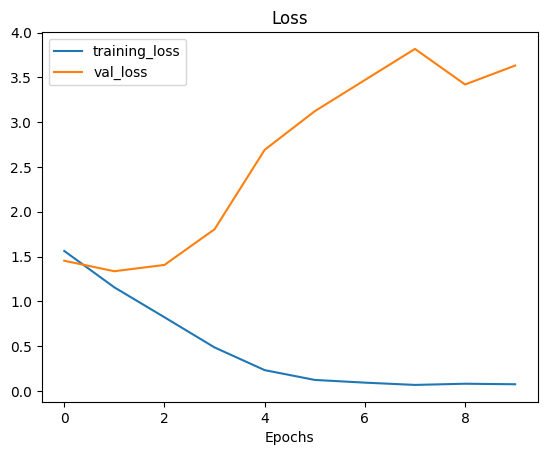

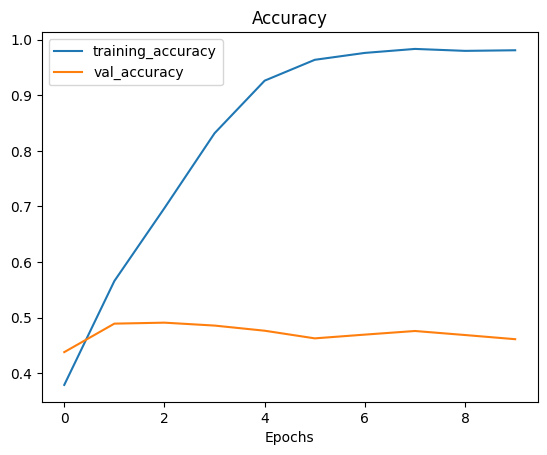

In [ ]:
plot_loss_curves(history_1)

### Model2

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Initialising Model
model_2 = Sequential()

In [ ]:
model_2.add(Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Conv2D(24, 3, activation='relu'))
model_2.add(Conv2D(24, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Conv2D(12, 3, activation='relu'))
model_2.add(Conv2D(12, 3, activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Flatten())
model_2.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 24)      6936      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 24)      5208      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 24)       0         
 2D)                                                  

In [ ]:
# Compiling the Model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
375/375 [==============================] - 297s 780ms/step - loss: 1.5665 - accuracy: 0.3752 - val_loss: 1.3696 - val_accuracy: 0.4557
Epoch 2/10
375/375 [==============================] - 293s 782ms/step - loss: 1.1986 - accuracy: 0.5434 - val_loss: 1.2889 - val_accuracy: 0.4980
Epoch 3/10
375/375 [==============================] - 295s 787ms/step - loss: 0.9931 - accuracy: 0.6326 - val_loss: 1.2739 - val_accuracy: 0.5170
Epoch 4/10
375/375 [==============================] - 303s 808ms/step - loss: 0.8297 - accuracy: 0.6953 - val_loss: 1.2970 - val_accuracy: 0.5293
Epoch 5/10
375/375 [==============================] - 295s 788ms/step - loss: 0.6756 - accuracy: 0.7549 - val_loss: 1.5693 - val_accuracy: 0.5153
Epoch 6/10
375/375 [==============================] - 294s 783ms/step - loss: 0.5476 - accuracy: 0.8026 - val_loss: 1.7098 - val_accuracy: 0.4902
Epoch 7/10
375/375 [==============================] - 292s 780ms/step - loss: 0.4418 - accuracy: 0.8412 - val_loss: 2.0050 -

In [ ]:
# Testimg model on test data
model_2.evaluate(test_data)

125/125 [==============================] - 76s 607ms/step - loss: 3.1441 - accuracy: 0.4765


[3.1440820693969727, 0.476500004529953]

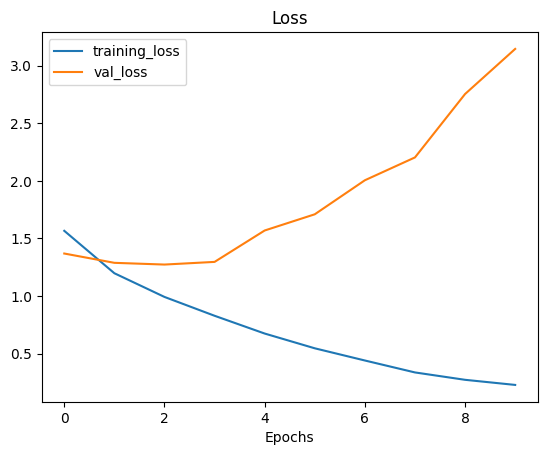

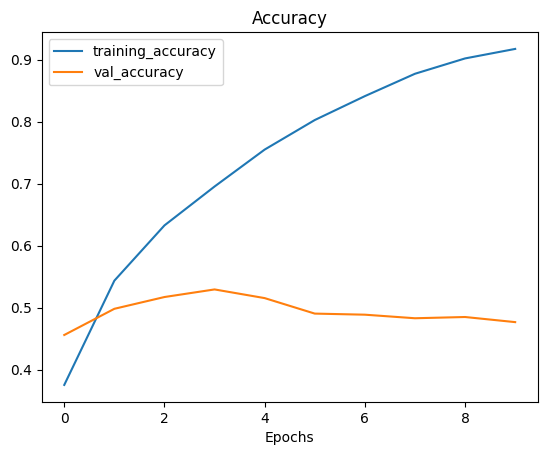

In [ ]:
plot_loss_curves(history_2)

### Model3

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Initialising Model
model_3 = Sequential()

In [ ]:
model_3.add(Conv2D(40, 3, activation='relu', input_shape=(224, 224, 3)))
model_3.add(Conv2D(40, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Conv2D(30, 3, activation='relu'))
model_3.add(Conv2D(30, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Conv2D(20, 3, activation='relu'))
model_3.add(Conv2D(20, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Conv2D(10, 3, activation='relu'))
model_3.add(Conv2D(10, 3, activation='relu'))
model_3.add(MaxPool2D())
model_3.add(Flatten())
model_3.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 40)      1120      
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 40)      14440     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 40)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 30)      10830     
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 30)      8130      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 30)       0         
 2D)                                                  

In [ ]:
# Compiling the Model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
375/375 [==============================] - 310s 807ms/step - loss: 1.8466 - accuracy: 0.2363 - val_loss: 1.4441 - val_accuracy: 0.4123
Epoch 2/10
375/375 [==============================] - 300s 802ms/step - loss: 1.3757 - accuracy: 0.4529 - val_loss: 1.3775 - val_accuracy: 0.4417
Epoch 3/10
375/375 [==============================] - 295s 787ms/step - loss: 1.2512 - accuracy: 0.5111 - val_loss: 1.3426 - val_accuracy: 0.4773
Epoch 4/10
375/375 [==============================] - 297s 792ms/step - loss: 1.1725 - accuracy: 0.5449 - val_loss: 1.2976 - val_accuracy: 0.4952
Epoch 5/10
375/375 [==============================] - 300s 801ms/step - loss: 1.1195 - accuracy: 0.5705 - val_loss: 1.2336 - val_accuracy: 0.5150
Epoch 6/10
375/375 [==============================] - 297s 792ms/step - loss: 1.0756 - accuracy: 0.5891 - val_loss: 1.2446 - val_accuracy: 0.5192
Epoch 7/10
375/375 [==============================] - 297s 792ms/step - loss: 1.0344 - accuracy: 0.6066 - val_loss: 1.2122 -

In [ ]:
# Testimg model on test data
model_3.evaluate(test_data)

125/125 [==============================] - 75s 596ms/step - loss: 1.2329 - accuracy: 0.5242


[1.2329105138778687, 0.5242499709129333]

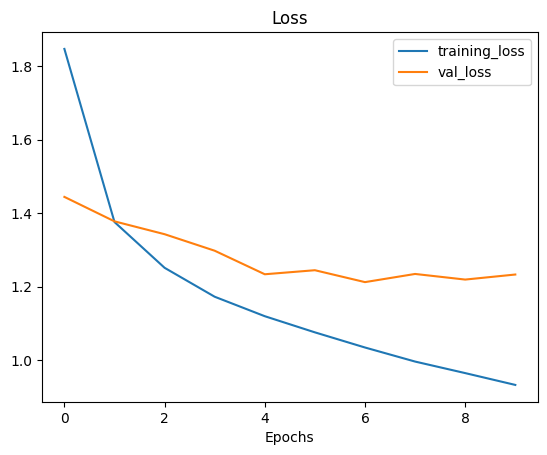

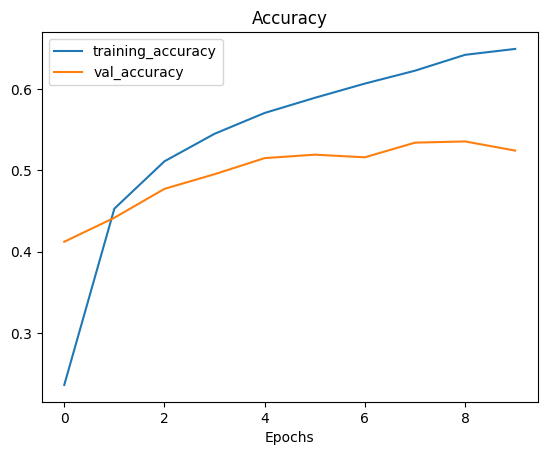

In [ ]:
plot_loss_curves(history_3)

### Model4

In [6]:
# Set random seed
tf.random.set_seed(42)

In [7]:
# Initialising Model
model_4 = Sequential()

In [8]:
model_4.add(Conv2D(40, 3, activation='relu', input_shape=(224, 224, 3)))
model_4.add(Conv2D(40, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Conv2D(40, 3, activation='relu'))
model_4.add(Conv2D(40, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Conv2D(20, 3, activation='relu'))
model_4.add(Conv2D(20, 3, activation='relu'))
model_4.add(MaxPool2D())
model_4.add(Flatten())
model_4.add(Dense(8, activation='softmax'))

In [9]:
# Displaying model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 40)      1120      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 40)      14440     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 40)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 40)      14440     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 40)      14440     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 40)       0         
 2D)                                                    

In [10]:
# Compiling the Model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [11]:
# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 658s 2s/step - loss: 2.0800 - accuracy: 0.1254 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 2/5
375/375 [==============================] - 303s 807ms/step - loss: 2.0796 - accuracy: 0.1227 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/5
375/375 [==============================] - 296s 790ms/step - loss: 2.0797 - accuracy: 0.1163 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/5
375/375 [==============================] - 290s 774ms/step - loss: 2.0797 - accuracy: 0.1192 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/5
375/375 [==============================] - 295s 785ms/step - loss: 2.0796 - accuracy: 0.1218 - val_loss: 2.0795 - val_accuracy: 0.1250


In [12]:
# Testimg model on test data
model_4.evaluate(test_data)

125/125 [==============================] - 77s 613ms/step - loss: 2.0795 - accuracy: 0.1250


[2.079451560974121, 0.125]

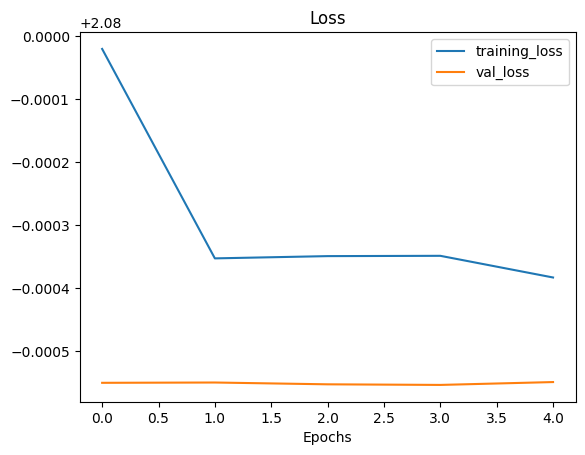

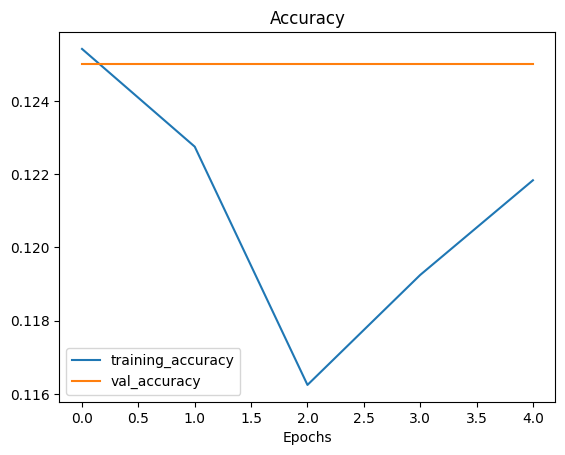

In [13]:
plot_loss_curves(history_4)

### Model5

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Initialising Model
model_5 = Sequential()

In [ ]:
model_5.add(Conv2D(60, 3, activation='relu', input_shape=(224, 224, 3)))
model_5.add(Conv2D(60, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Conv2D(30, 3, activation='relu'))
model_5.add(Conv2D(30, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(Conv2D(10, 3, activation='relu'))
model_5.add(MaxPool2D())
model_5.add(Flatten())
model_5.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 60)      1680      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 60)      32460     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 60)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 30)      16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 30)      8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 30)       0         
 2D)                                                    

In [ ]:
# Compiling the Model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 393s 1s/step - loss: 1.7839 - accuracy: 0.2743 - val_loss: 1.4212 - val_accuracy: 0.4437
Epoch 2/5
375/375 [==============================] - 314s 837ms/step - loss: 1.2224 - accuracy: 0.5292 - val_loss: 1.2834 - val_accuracy: 0.4890
Epoch 3/5
375/375 [==============================] - 306s 817ms/step - loss: 1.0215 - accuracy: 0.6143 - val_loss: 1.2695 - val_accuracy: 0.5105
Epoch 4/5
375/375 [==============================] - 305s 812ms/step - loss: 0.8535 - accuracy: 0.6823 - val_loss: 1.2947 - val_accuracy: 0.5160
Epoch 5/5
375/375 [==============================] - 304s 808ms/step - loss: 0.6984 - accuracy: 0.7448 - val_loss: 1.4020 - val_accuracy: 0.4965


In [ ]:
# Testimg model on test data
model_5.evaluate(test_data)

125/125 [==============================] - 77s 617ms/step - loss: 1.4020 - accuracy: 0.4965


[1.4019603729248047, 0.4964999854564667]

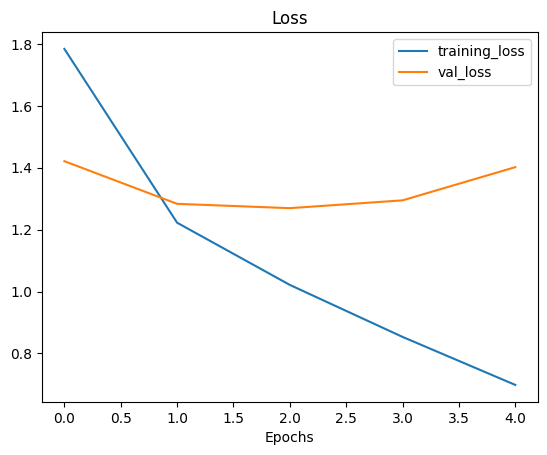

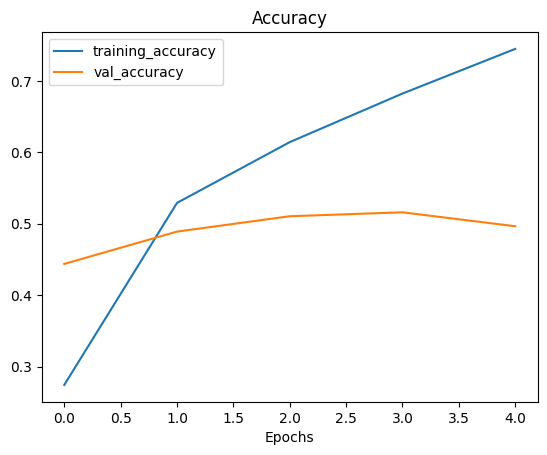

In [ ]:
plot_loss_curves(history_5)

### Model6

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# Initialising Model
model_6 = Sequential()

In [ ]:
model_6.add(Conv2D(60, 3, activation='relu', input_shape=(224, 224, 3)))
model_6.add(Conv2D(60, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(30, 3, activation='relu'))
model_6.add(Conv2D(30, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(Conv2D(10, 3, activation='relu'))
model_6.add(MaxPool2D())
model_6.add(Flatten())
model_6.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 60)      1680      
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 60)      32460     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 60)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 30)      16230     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 30)      8130      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 30)       0         
 2D)                                                  

In [ ]:
# Compiling the Model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 310s 819ms/step - loss: 1.7504 - accuracy: 0.2947 - val_loss: 1.4094 - val_accuracy: 0.4412
Epoch 2/5
375/375 [==============================] - 305s 814ms/step - loss: 1.2463 - accuracy: 0.5190 - val_loss: 1.2573 - val_accuracy: 0.5090
Epoch 3/5
375/375 [==============================] - 310s 826ms/step - loss: 1.0331 - accuracy: 0.6117 - val_loss: 1.2236 - val_accuracy: 0.5242
Epoch 4/5
375/375 [==============================] - 306s 815ms/step - loss: 0.8677 - accuracy: 0.6796 - val_loss: 1.2954 - val_accuracy: 0.5253
Epoch 5/5
375/375 [==============================] - 304s 812ms/step - loss: 0.7149 - accuracy: 0.7353 - val_loss: 1.4581 - val_accuracy: 0.5113


In [ ]:
# Testimg model on test data
model_6.evaluate(test_data)

125/125 [==============================] - 78s 621ms/step - loss: 1.4581 - accuracy: 0.5113


[1.4580897092819214, 0.5112500190734863]

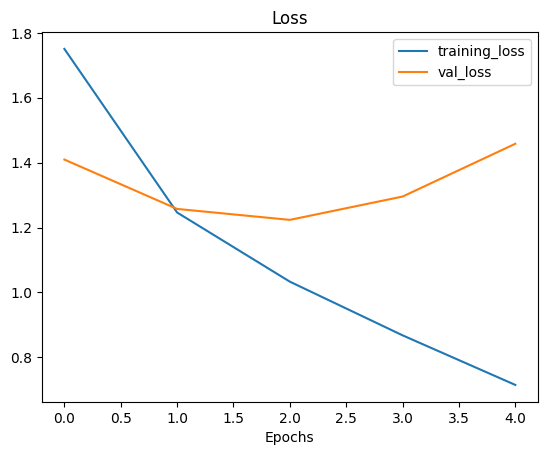

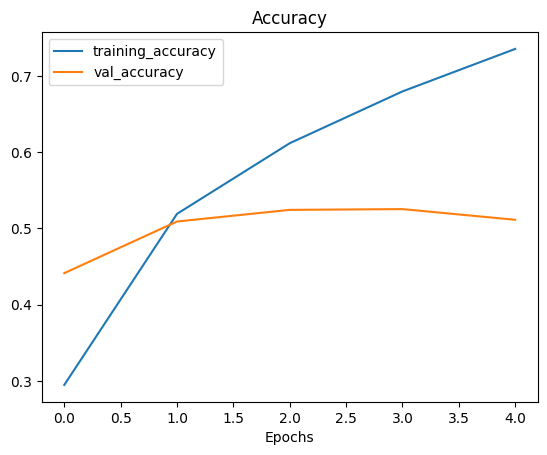

In [ ]:
plot_loss_curves(history_6)

### Model7

In [14]:
# Set random seed
tf.random.set_seed(42)

In [15]:
# Initialising Model
model_7 = Sequential()

In [16]:
model_7.add(Conv2D(60, 3, activation='relu', input_shape=(224, 224, 3)))
model_7.add(Conv2D(60, 3, activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(40, 3, activation='relu'))
model_7.add(Conv2D(40, 3, activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Conv2D(20, 3, activation='relu'))
model_7.add(Conv2D(20, 3, activation='relu'))
model_7.add(MaxPool2D())
model_7.add(Flatten())
model_7.add(Dense(8, activation='softmax'))

In [17]:
# Displaying model summary
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 60)      1680      
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 60)      32460     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 60)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 40)      21640     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 40)      14440     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 40)       0         
 2D)                                                  

In [18]:
# Compiling the Model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [19]:
# Fit the model
history_7 = model_7.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 314s 814ms/step - loss: 1.5915 - accuracy: 0.3639 - val_loss: 1.3272 - val_accuracy: 0.4785
Epoch 2/5
375/375 [==============================] - 303s 808ms/step - loss: 1.1995 - accuracy: 0.5401 - val_loss: 1.2439 - val_accuracy: 0.5117
Epoch 3/5
375/375 [==============================] - 303s 809ms/step - loss: 1.0128 - accuracy: 0.6162 - val_loss: 1.2532 - val_accuracy: 0.5107
Epoch 4/5
375/375 [==============================] - 302s 805ms/step - loss: 0.8622 - accuracy: 0.6759 - val_loss: 1.2997 - val_accuracy: 0.5295
Epoch 5/5
375/375 [==============================] - 303s 809ms/step - loss: 0.7349 - accuracy: 0.7314 - val_loss: 1.3345 - val_accuracy: 0.5132


In [20]:
# Testimg model on test data
model_7.evaluate(test_data)

125/125 [==============================] - 78s 619ms/step - loss: 1.3345 - accuracy: 0.5132


[1.3345340490341187, 0.5132499933242798]

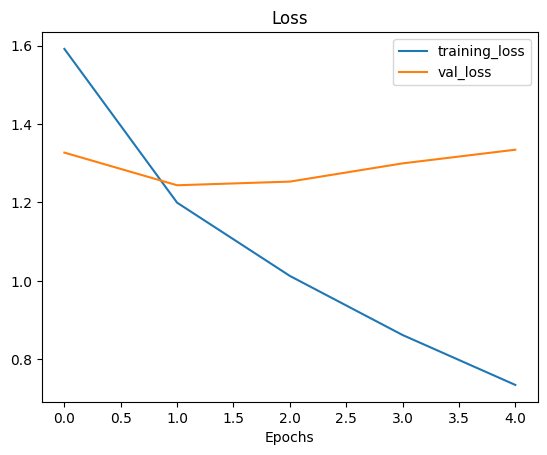

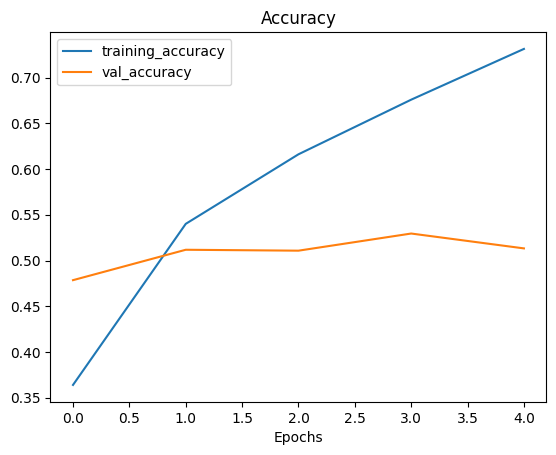

In [21]:
plot_loss_curves(history_7)

### Model8

In [22]:
# Initialising Model
model_8 = Sequential()

In [23]:
model_8.add(Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)))
model_8.add(Conv2D(64, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(128, 3, activation='relu'))
model_8.add(Conv2D(128, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(32, 3, activation='relu'))
model_8.add(Conv2D(32, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(64, 3, activation='relu'))
model_8.add(Conv2D(64, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Conv2D(16, 3, activation='relu'))
model_8.add(Conv2D(16, 3, activation='relu'))
model_8.add(MaxPool2D())
model_8.add(Flatten())
model_8.add(Dense(8, activation='softmax'))

In [24]:
# Displaying model summary
model_8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

In [25]:
# Compiling the Model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [26]:
# Fit the model
history_8 = model_8.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 322s 828ms/step - loss: 2.0799 - accuracy: 0.1160 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 2/5
375/375 [==============================] - 308s 822ms/step - loss: 2.0796 - accuracy: 0.1245 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 3/5
375/375 [==============================] - 303s 809ms/step - loss: 2.0796 - accuracy: 0.1233 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 4/5
375/375 [==============================] - 308s 820ms/step - loss: 2.0796 - accuracy: 0.1227 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/5
375/375 [==============================] - 301s 804ms/step - loss: 2.0796 - accuracy: 0.1143 - val_loss: 2.0794 - val_accuracy: 0.1250


In [27]:
# Testimg model on test data
model_8.evaluate(test_data)

125/125 [==============================] - 76s 606ms/step - loss: 2.0794 - accuracy: 0.1250


[2.079449415206909, 0.125]

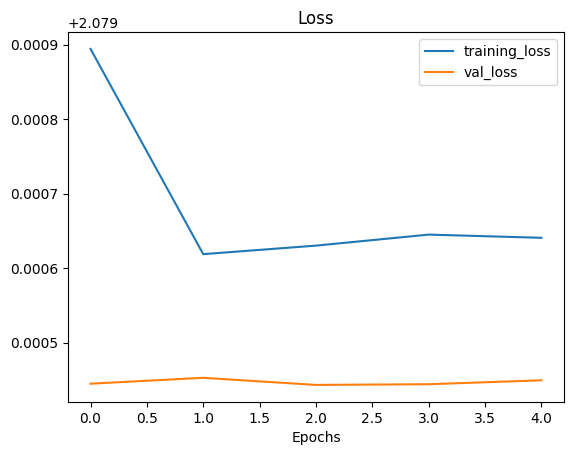

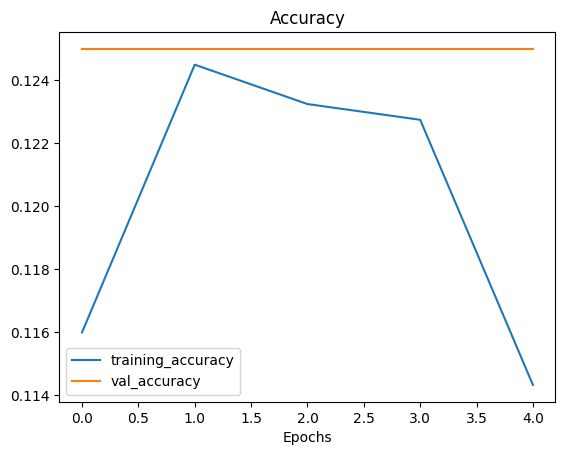

In [28]:
plot_loss_curves(history_8)

### Model9

In [37]:
# Initialising Model
model_9 = Sequential()

In [38]:
model_9.add(Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)))
model_9.add(Conv2D(64, 3, activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Conv2D(128, 3, activation='relu'))
model_9.add(Conv2D(128, 3, activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Conv2D(32, 3, activation='relu'))
model_9.add(Conv2D(32, 3, activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Conv2D(64, 3, activation='relu'))
model_9.add(Conv2D(64, 3, activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Conv2D(16, 3, activation='relu'))
model_9.add(Conv2D(16, 3, activation='relu'))
model_9.add(MaxPool2D())
model_9.add(Flatten())
model_9.add(Dense(8, activation='softmax'))

In [31]:
# Displaying model summary
model_9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 128)      0         
 g2D)                                                 

In [32]:
# Compiling the Model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
# Fit the model
history_9 = model_9.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
375/375 [==============================] - 305s 802ms/step - loss: 1.8071 - accuracy: 0.2495 - val_loss: 1.5355 - val_accuracy: 0.3543
Epoch 2/5
375/375 [==============================] - 312s 832ms/step - loss: 1.5108 - accuracy: 0.3747 - val_loss: 1.4865 - val_accuracy: 0.4020
Epoch 3/5
375/375 [==============================] - 304s 810ms/step - loss: 1.4406 - accuracy: 0.4128 - val_loss: 1.4412 - val_accuracy: 0.4165
Epoch 4/5
375/375 [==============================] - 304s 812ms/step - loss: 1.3805 - accuracy: 0.4400 - val_loss: 1.3608 - val_accuracy: 0.4412
Epoch 5/5
375/375 [==============================] - 303s 808ms/step - loss: 1.3167 - accuracy: 0.4716 - val_loss: 1.3266 - val_accuracy: 0.4597


In [34]:
# Testimg model on test data
model_9.evaluate(test_data)

125/125 [==============================] - 77s 613ms/step - loss: 1.3266 - accuracy: 0.4597


[1.3266472816467285, 0.4597499966621399]

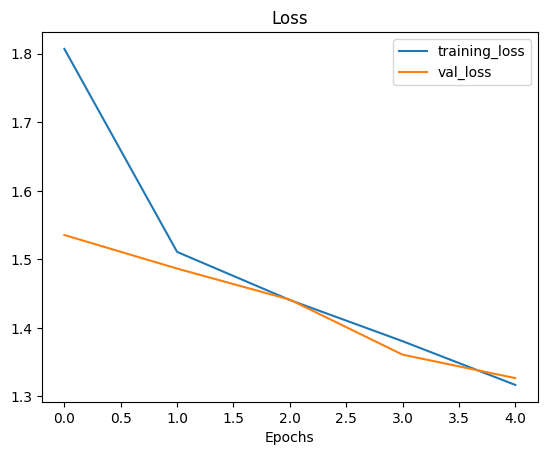

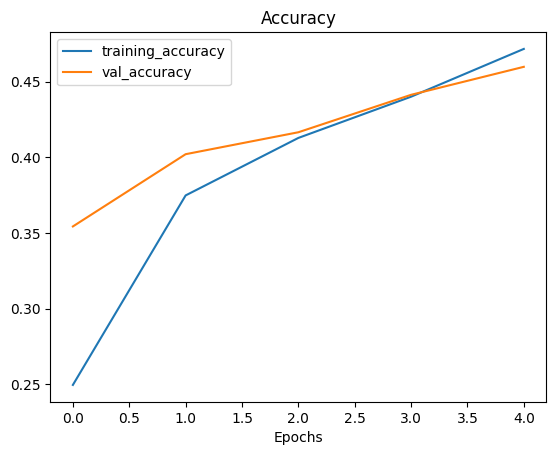

In [35]:
plot_loss_curves(history_9)

### Model 10

In [ ]:
# Initialising Model
model_10 = Sequential()

In [ ]:
model_10.add(Conv2D(64, 3, activation='relu', input_shape=(224, 224, 3)))
model_10.add(Conv2D(64, 3, activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Conv2D(128, 3, activation='relu'))
model_10.add(Conv2D(128, 3, activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Conv2D(64, 3, activation='relu'))
model_10.add(Conv2D(64, 3, activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Conv2D(128, 3, activation='relu'))
model_10.add(Conv2D(128, 3, activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Conv2D(16, 3, activation='relu'))
model_10.add(Conv2D(16, 3, activation='relu'))
model_10.add(MaxPool2D())
model_10.add(Flatten())
model_10.add(Dense(8, activation='softmax'))

In [ ]:
# Displaying model summary
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 128)      0         
 g2D)                                                 

In [ ]:
# Compiling the Model
model_10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [39]:
# Fit the model
history_10 = model_10.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
375/375 [==============================] - 351s 933ms/step - loss: 2.0658 - accuracy: 0.1295 - val_loss: 1.6956 - val_accuracy: 0.3598
Epoch 2/10
375/375 [==============================] - 350s 934ms/step - loss: 1.5399 - accuracy: 0.3644 - val_loss: 1.4521 - val_accuracy: 0.5065
Epoch 3/10
375/375 [==============================] - 362s 966ms/step - loss: 1.3925 - accuracy: 0.4367 - val_loss: 1.3710 - val_accuracy: 0.5543
Epoch 4/10
375/375 [==============================] - 423s 1s/step - loss: 1.3148 - accuracy: 0.4722 - val_loss: 1.3394 - val_accuracy: 0.5685
Epoch 5/10
375/375 [==============================] - 485s 1s/step - loss: 1.2511 - accuracy: 0.5040 - val_loss: 1.2778 - val_accuracy: 0.5758
Epoch 6/10
375/375 [==============================] - 508s 1s/step - loss: 1.2038 - accuracy: 0.5301 - val_loss: 1.2643 - val_accuracy: 0.5983
Epoch 7/10
375/375 [==============================] - 521s 1s/step - loss: 1.1498 - accuracy: 0.5569 - val_loss: 1.2229 - val_accurac

In [40]:
# Testimg model on test data
model_10.evaluate(test_data)

125/125 [==============================] - 27s 215ms/step - loss: 1.6476 - accuracy: 0.6575
[1.6475701332092285, 0.6574999785423279]


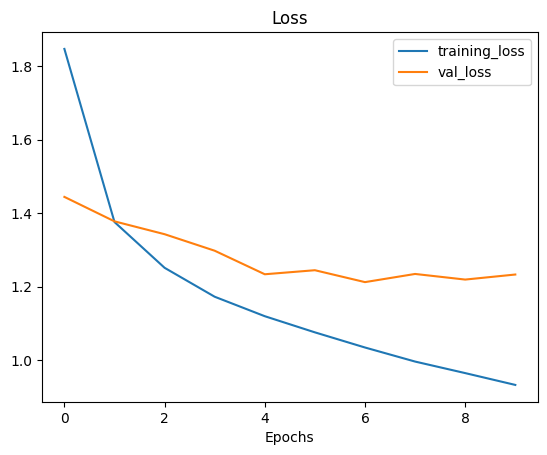

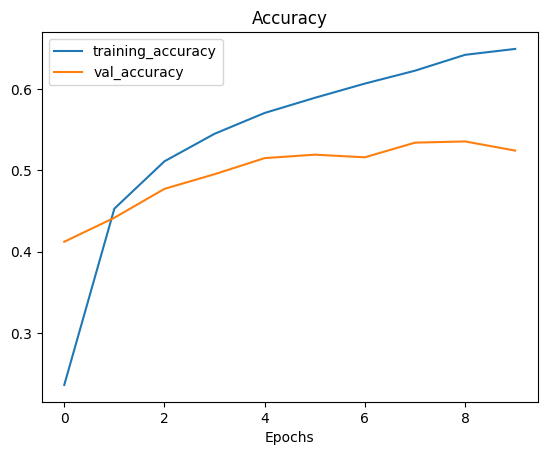

In [ ]:
plot_loss_curves(history_10)